# Problem statement

##### Prepare a classification model using Naive Bayes for salary data 

# Importing the libraries

In [1]:
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import seaborn as sn
import pandas as pd
from sklearn.model_selection import GridSearchCV,train_test_split
import numpy as np
import imblearn
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
from sklearn.svm import SVC

# Loading the dataset

##### We have 2 csv files, one is train data and other is test data so we will load both the datasets

In [2]:
salary_train = pd.read_csv("SalaryData_Train.csv")

In [3]:
salary_test = pd.read_csv("SalaryData_Test.csv")

In [4]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


###### We can just peek into few data points by using head function of pandas. By default, head function return top 5 values 

# Data Insights

In [6]:
salary_train.shape

(30161, 14)

In [7]:
salary_test.shape

(15060, 14)

##### We have total 30,161 rows in our training data and 15,060 rows in test data. The total columns or features are 14

In [8]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [9]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


##### We can see there are no null values in our data and there are few numerical values and few categorical values. The colums with dtype (data type) as int64 are numerical (continuous) and as object are categorical

##### The categorical columns needs to be converted into numerical by using encoding techniques (One Hot Encoding or Label Encoding)

In [10]:
salary_train['workclass'].dtype

dtype('O')

In [11]:
salary_train['age'].dtype

dtype('int64')

In [12]:
dup_train = salary_train.duplicated()
print('Number of duplicate rows: %d' % dup_train.sum())

Number of duplicate rows: 3258


In [13]:
dup_test = salary_test.duplicated()
print('Number of duplicate rows: %d' % dup_test.sum())

Number of duplicate rows: 930


In [14]:
print('Number of rows before discarding duplicates = %d' % salary_train.shape[0])

salary_train = salary_train.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % salary_train.shape[0])

Number of rows before discarding duplicates = 30161
Number of rows after discarding duplicates = 26903


In [15]:
print('Number of rows before discarding duplicates = %d' % salary_test.shape[0])

salary_test = salary_test.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % salary_test.shape[0])

Number of rows before discarding duplicates = 15060
Number of rows after discarding duplicates = 14130


### Frequency counts of categorical variables for train data


##### We need to convert categorical columns into numerical values by using encoding techniques. There are 2 most popular encoding techniques - One Hot and Label Encoding technique.

##### We will use Label Encoding for ordinal data and One Hot Encoding for nominal data. In our dataset, we have education which is ordinal (the values follows an order Preschool,1st-4th,5th-6th,etc..) so we will use Label Encoding technique for education. The other colums are not ordinal so we will One Hot Encoding technique for the other columns.

In [16]:
salary_train['workclass'].value_counts()

 Private             19213
 Self-emp-not-inc     2431
 Local-gov            2014
 State-gov            1253
 Self-emp-inc         1049
 Federal-gov           929
 Without-pay            14
Name: workclass, dtype: int64

In [17]:
salary_train = pd.get_dummies(salary_train, columns=['workclass'])
salary_train.head()

,age,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
0,39,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,0,0,0,0,1,0
1,50,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0,0,0,1,0,0
2,38,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0,1,0,0,0,0
3,53,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0,1,0,0,0,0
4,28,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0,1,0,0,0,0


In [18]:
salary_train['education'].value_counts()

 HS-grad         8268
 Some-college    5893
 Bachelors       4503
 Masters         1558
 Assoc-voc       1256
 Assoc-acdm       994
 11th             941
 10th             770
 7th-8th          541
 Prof-school      532
 9th              449
 Doctorate        364
 12th             358
 5th-6th          283
 1st-4th          149
 Preschool         44
Name: education, dtype: int64

In [19]:
label_encoder = preprocessing.LabelEncoder() 
 
salary_train['education']= label_encoder.fit_transform(salary_train['education']) 
  
salary_train['education'].unique()

array([ 9, 11,  1, 12,  6, 15,  7,  5, 10,  8, 14,  4,  0, 13,  2,  3])

In [20]:
salary_train.head()

,age,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
0,39,9,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,0,0,0,0,1,0
1,50,9,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0,0,0,1,0,0
2,38,11,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0,1,0,0,0,0
3,53,1,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0,1,0,0,0,0
4,28,9,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0,1,0,0,0,0


In [21]:
salary_train['maritalstatus'].value_counts()

 Married-civ-spouse       12371
 Never-married             8387
 Divorced                  4009
 Separated                  928
 Widowed                    817
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

In [22]:
salary_train = pd.get_dummies(salary_train, columns=['maritalstatus'])
salary_train.head()

,age,education,educationno,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,...,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,maritalstatus_ Divorced,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed
0,39,9,13,Adm-clerical,Not-in-family,White,Male,2174,0,40,...,0,1,0,0,0,0,0,1,0,0
1,50,9,13,Exec-managerial,Husband,White,Male,0,0,13,...,1,0,0,0,0,1,0,0,0,0
2,38,11,9,Handlers-cleaners,Not-in-family,White,Male,0,0,40,...,0,0,0,1,0,0,0,0,0,0
3,53,1,7,Handlers-cleaners,Husband,Black,Male,0,0,40,...,0,0,0,0,0,1,0,0,0,0
4,28,9,13,Prof-specialty,Wife,Black,Female,0,0,40,...,0,0,0,0,0,1,0,0,0,0


In [23]:
salary_train['occupation'].value_counts()

 Prof-specialty       3783
 Exec-managerial      3646
 Adm-clerical         3291
 Craft-repair         3229
 Sales                3205
 Other-service        2914
 Machine-op-inspct    1665
 Transport-moving     1420
 Handlers-cleaners    1159
 Farming-fishing       957
 Tech-support          858
 Protective-serv       626
 Priv-house-serv       141
 Armed-Forces            9
Name: occupation, dtype: int64

In [24]:
salary_train = pd.get_dummies(salary_train, columns=['occupation'])
salary_train.head()

,age,education,educationno,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,...,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,39,9,13,Not-in-family,White,Male,2174,0,40,United-States,...,0,0,0,0,0,0,0,0,0,0
1,50,9,13,Husband,White,Male,0,0,13,United-States,...,0,0,0,0,0,0,0,0,0,0
2,38,11,9,Not-in-family,White,Male,0,0,40,United-States,...,0,1,0,0,0,0,0,0,0,0
3,53,1,7,Husband,Black,Male,0,0,40,United-States,...,0,1,0,0,0,0,0,0,0,0
4,28,9,13,Wife,Black,Female,0,0,40,Cuba,...,0,0,0,0,0,1,0,0,0,0


In [25]:
salary_train['relationship'].value_counts()

 Husband           10809
 Not-in-family      7115
 Own-child          3655
 Unmarried          3086
 Wife               1366
 Other-relative      872
Name: relationship, dtype: int64

In [26]:
salary_train = pd.get_dummies(salary_train, columns=['relationship'])
salary_train.head()

,age,education,educationno,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,...,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,39,9,13,White,Male,2174,0,40,United-States,<=50K,...,0,0,0,0,0,1,0,0,0,0
1,50,9,13,White,Male,0,0,13,United-States,<=50K,...,0,0,0,0,1,0,0,0,0,0
2,38,11,9,White,Male,0,0,40,United-States,<=50K,...,0,0,0,0,0,1,0,0,0,0
3,53,1,7,Black,Male,0,0,40,United-States,<=50K,...,0,0,0,0,1,0,0,0,0,0
4,28,9,13,Black,Female,0,0,40,Cuba,<=50K,...,0,0,0,0,0,0,0,0,0,1


In [27]:
salary_train['race'].value_counts()

 White                 22758
 Black                  2734
 Asian-Pac-Islander      894
 Amer-Indian-Eskimo      286
 Other                   231
Name: race, dtype: int64

In [28]:
salary_train = pd.get_dummies(salary_train, columns=['race'])
salary_train.head()

,age,education,educationno,sex,capitalgain,capitalloss,hoursperweek,native,Salary,workclass_ Federal-gov,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,9,13,Male,2174,0,40,United-States,<=50K,0,...,1,0,0,0,0,0,0,0,0,1
1,50,9,13,Male,0,0,13,United-States,<=50K,0,...,0,0,0,0,0,0,0,0,0,1
2,38,11,9,Male,0,0,40,United-States,<=50K,0,...,1,0,0,0,0,0,0,0,0,1
3,53,1,7,Male,0,0,40,United-States,<=50K,0,...,0,0,0,0,0,0,0,1,0,0
4,28,9,13,Female,0,0,40,Cuba,<=50K,0,...,0,0,0,0,1,0,0,1,0,0


In [29]:
salary_train['sex'].value_counts()

 Male      17961
 Female     8942
Name: sex, dtype: int64

In [30]:
salary_train = pd.get_dummies(salary_train, columns=['sex'])
salary_train.head()

,age,education,educationno,capitalgain,capitalloss,hoursperweek,native,Salary,workclass_ Federal-gov,workclass_ Local-gov,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,9,13,2174,0,40,United-States,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,9,13,0,0,13,United-States,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,11,9,0,0,40,United-States,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,1,7,0,0,40,United-States,<=50K,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,9,13,0,0,40,Cuba,<=50K,0,0,...,0,0,1,0,0,1,0,0,1,0


In [31]:
salary_train['native'].value_counts()

 United-States                 24259
 Mexico                          600
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 El-Salvador                     100
 India                           100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 Italy                            68
 China                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        61
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [32]:
salary_train = pd.get_dummies(salary_train, columns=['native'])
salary_train.head()

,age,education,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,9,13,2174,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,9,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,11,9,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,1,7,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,9,13,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
salary_train['Salary'].value_counts()

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

##### We could see that the count of Salary<=50K is very high when compared to Salary>=50K. The sets of data in which classes are not evenly distributed are called imbalanced datasets.The imbalance dataset can cause high/low accuracy value of the model due to a certain class.

### Frequency counts of categorical variables for test data

In [34]:
salary_test['workclass'].value_counts()

 Private             10138
 Self-emp-not-inc     1279
 Local-gov            1017
 State-gov             664
 Self-emp-inc          565
 Federal-gov           460
 Without-pay             7
Name: workclass, dtype: int64

In [35]:
salary_test = pd.get_dummies(salary_test, columns=['workclass'])
salary_test.head()

,age,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
0,25,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,0,1,0,0,0,0
1,38,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,0,1,0,0,0,0
2,28,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0,1,0,0,0,0,0
3,44,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,0,0,1,0,0,0,0
4,34,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,0,0,1,0,0,0,0


In [36]:
salary_test['education'].value_counts()

 HS-grad         4473
 Some-college    3014
 Bachelors       2369
 Masters          864
 Assoc-voc        634
 11th             542
 Assoc-acdm       493
 10th             395
 7th-8th          265
 Prof-school      241
 9th              219
 12th             194
 Doctorate        168
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: education, dtype: int64

In [37]:
salary_test['education']= label_encoder.fit_transform(salary_test['education']) 
  
salary_test['education'].unique()

array([ 1, 11,  7, 15,  0, 14,  5,  9, 12,  4,  8,  6, 10,  2,  3, 13])

In [38]:
salary_test['maritalstatus'].value_counts()

 Married-civ-spouse       6490
 Never-married            4501
 Divorced                 2026
 Separated                 470
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: maritalstatus, dtype: int64

In [39]:
salary_test = pd.get_dummies(salary_test, columns=['maritalstatus'])
salary_test.head()

,age,education,educationno,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,...,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,maritalstatus_ Divorced,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed
0,25,1,7,Machine-op-inspct,Own-child,Black,Male,0,0,40,...,0,0,0,0,0,0,0,1,0,0
1,38,11,9,Farming-fishing,Husband,White,Male,0,0,50,...,0,0,0,0,0,1,0,0,0,0
2,28,7,12,Protective-serv,Husband,White,Male,0,0,40,...,0,0,0,0,0,1,0,0,0,0
3,44,15,10,Machine-op-inspct,Husband,Black,Male,7688,0,40,...,0,0,0,0,0,1,0,0,0,0
4,34,0,6,Other-service,Not-in-family,White,Male,0,0,30,...,0,0,0,0,0,0,0,1,0,0


In [40]:
salary_test['occupation'].value_counts()

 Prof-specialty       1899
 Exec-managerial      1897
 Craft-repair         1729
 Sales                1715
 Adm-clerical         1703
 Other-service        1513
 Machine-op-inspct     913
 Transport-moving      710
 Handlers-cleaners     648
 Tech-support          499
 Farming-fishing       484
 Protective-serv       326
 Priv-house-serv        89
 Armed-Forces            5
Name: occupation, dtype: int64

In [41]:
salary_test = pd.get_dummies(salary_test, columns=['occupation'])
salary_test.head()

,age,education,educationno,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,...,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,25,1,7,Own-child,Black,Male,0,0,40,United-States,...,0,0,1,0,0,0,0,0,0,0
1,38,11,9,Husband,White,Male,0,0,50,United-States,...,1,0,0,0,0,0,0,0,0,0
2,28,7,12,Husband,White,Male,0,0,40,United-States,...,0,0,0,0,0,0,1,0,0,0
3,44,15,10,Husband,Black,Male,7688,0,40,United-States,...,0,0,1,0,0,0,0,0,0,0
4,34,0,6,Not-in-family,White,Male,0,0,30,United-States,...,0,0,0,1,0,0,0,0,0,0


In [42]:
salary_test['relationship'].value_counts()

 Husband           5714
 Not-in-family     3813
 Own-child         1928
 Unmarried         1543
 Wife               674
 Other-relative     458
Name: relationship, dtype: int64

In [43]:
salary_test = pd.get_dummies(salary_test, columns=['relationship'])
salary_test.head()

,age,education,educationno,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,...,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,25,1,7,Black,Male,0,0,40,United-States,<=50K,...,0,0,0,0,0,0,0,1,0,0
1,38,11,9,White,Male,0,0,50,United-States,<=50K,...,0,0,0,0,1,0,0,0,0,0
2,28,7,12,White,Male,0,0,40,United-States,>50K,...,1,0,0,0,1,0,0,0,0,0
3,44,15,10,Black,Male,7688,0,40,United-States,>50K,...,0,0,0,0,1,0,0,0,0,0
4,34,0,6,White,Male,0,0,30,United-States,<=50K,...,0,0,0,0,0,1,0,0,0,0


In [44]:
salary_test['race'].value_counts()

 White                 12051
 Black                  1400
 Asian-Pac-Islander      408
 Amer-Indian-Eskimo      149
 Other                   122
Name: race, dtype: int64

In [45]:
salary_test = pd.get_dummies(salary_test, columns=['race'])
salary_test.head()

,age,education,educationno,sex,capitalgain,capitalloss,hoursperweek,native,Salary,workclass_ Federal-gov,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,25,1,7,Male,0,0,40,United-States,<=50K,0,...,0,0,1,0,0,0,0,1,0,0
1,38,11,9,Male,0,0,50,United-States,<=50K,0,...,0,0,0,0,0,0,0,0,0,1
2,28,7,12,Male,0,0,40,United-States,>50K,0,...,0,0,0,0,0,0,0,0,0,1
3,44,15,10,Male,7688,0,40,United-States,>50K,0,...,0,0,0,0,0,0,0,1,0,0
4,34,0,6,Male,0,0,30,United-States,<=50K,0,...,1,0,0,0,0,0,0,0,0,1


In [46]:
salary_test['sex'].value_counts()

 Male      9455
 Female    4675
Name: sex, dtype: int64

In [47]:
salary_test = pd.get_dummies(salary_test, columns=['sex'])
salary_test.head()

,age,education,educationno,capitalgain,capitalloss,hoursperweek,native,Salary,workclass_ Federal-gov,workclass_ Local-gov,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,25,1,7,0,0,40,United-States,<=50K,0,0,...,1,0,0,0,0,1,0,0,0,1
1,38,11,9,0,0,50,United-States,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,1
2,28,7,12,0,0,40,United-States,>50K,0,1,...,0,0,0,0,0,0,0,1,0,1
3,44,15,10,7688,0,40,United-States,>50K,0,0,...,0,0,0,0,0,1,0,0,0,1
4,34,0,6,0,0,30,United-States,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,1


In [48]:
salary_test['native'].value_counts()

 United-States                 12859
 Mexico                          292
 Philippines                      95
 Puerto-Rico                      66
 Germany                          65
 Canada                           56
 India                            47
 El-Salvador                      47
 China                            45
 Cuba                             41
 England                          33
 Italy                            32
 South                            30
 Japan                            30
 Dominican-Republic               30
 Portugal                         28
 Haiti                            27
 Columbia                         26
 Poland                           25
 Jamaica                          23
 Guatemala                        23
 Greece                           20
 Vietnam                          19
 Ecuador                          16
 Nicaragua                        15
 Peru                             15
 Iran                             14
 

In [49]:
salary_test = pd.get_dummies(salary_test, columns=['native'])
salary_test.head()

,age,education,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,1,7,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,11,9,0,0,50,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,7,12,0,0,40,>50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,15,10,7688,0,40,>50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,34,0,6,0,0,30,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [50]:
salary_test['Salary'].value_counts()

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

##### We could see that the count of Salary<=50K is very high when compared to Salary>=50K. The sets of data in which classes are not evenly distributed are called imbalanced datasets.The imbalance dataset can cause high/low accuracy value of the model due to a certain class.

# Summary statistics

In [51]:
salary_train.describe()

,age,education,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
count,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,...,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000
mean,39.049140,10.254135,10.144296,1215.443259,98.427499,41.164591,0.034531,0.074862,0.714158,0.038992,...,0.001264,0.004052,0.000409,0.002639,0.001561,0.000632,0.000669,0.901721,0.002379,0.000595
std,13.188825,3.864670,2.620154,7805.366384,425.493211,12.347051,0.182593,0.263173,0.451823,0.193579,...,0.035528,0.063524,0.020217,0.051305,0.039481,0.025130,0.025858,0.297697,0.048717,0.024380
min,17.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,9.000000,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.000000,11.000000,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,48.000000,12.000000,13.000000,0.000000,0.000000,45.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,90.000000,15.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
salary_test.describe()

,age,education,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
count,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000,...,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000
mean,39.155414,10.223355,10.120736,1185.899292,94.499646,41.073885,0.032555,0.071975,0.717481,0.039986,...,0.001982,0.004671,0.000637,0.002123,0.000920,0.000849,0.000566,0.910050,0.001345,0.000495
std,13.429544,3.866601,2.602557,7903.191981,417.955786,12.268036,0.177475,0.258455,0.450241,0.195933,...,0.044473,0.068187,0.025231,0.046030,0.030319,0.029131,0.023788,0.286121,0.036646,0.022253
min,17.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,9.000000,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.000000,11.000000,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,48.000000,12.000000,13.000000,0.000000,0.000000,45.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,90.000000,15.000000,16.000000,99999.000000,3770.000000,99.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### We can see there is a lot of difference in mean values and max values for capitalgain and capitalloss columns. There are outliers in our data. We will further use boxplots to check the outliers

# Understanding the target variable

##### Our main objective is to identify the salary class for the given features. So our target variable is salary.

In [53]:
salary_train['Salary'].value_counts()

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

In [54]:
salary_test['Salary'].value_counts()

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

##### We can see the majority of the people are having Salary less than 50K. The data is imbalanced. The sets of data in which classes are not evenly distributed are called imbalanced datasets.The imbalance dataset can cause high/low accuracy value of the model due to a certain class.

<AxesSubplot:xlabel='Salary', ylabel='count'>

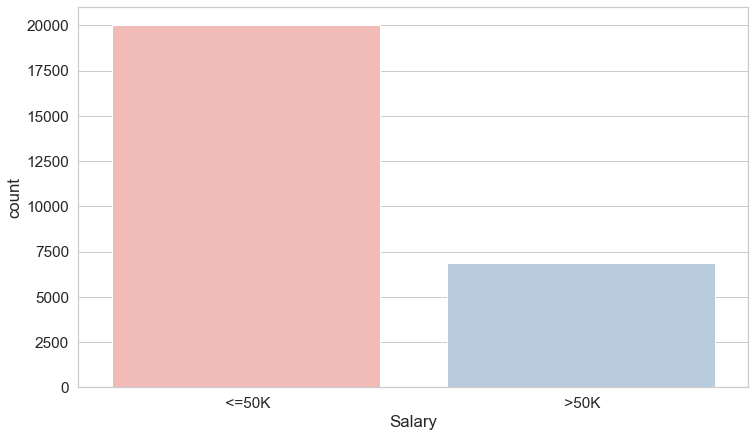

In [55]:
sn.set(style = 'whitegrid', font_scale = 1.4)
plt.subplots(figsize = (12,7))
sn.countplot(x = 'Salary', data = salary_train, palette = 'Pastel1')

<AxesSubplot:xlabel='Salary', ylabel='count'>

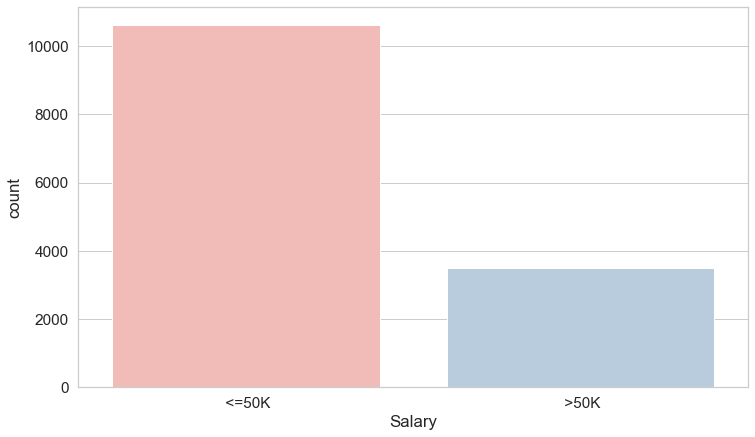

In [56]:
sn.set(style = 'whitegrid', font_scale = 1.4)
plt.subplots(figsize = (12,7))
sn.countplot(x = 'Salary', data = salary_test, palette = 'Pastel1')

##### We can notice there is lot of difference in the count for salary<=50K and >50K

# Data visualization

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age'>

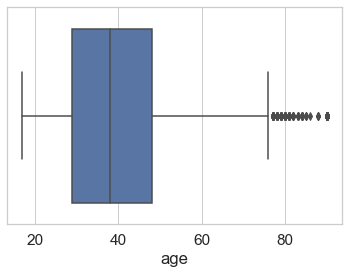

In [57]:
sn.boxplot(salary_train['age'])

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='educationno'>

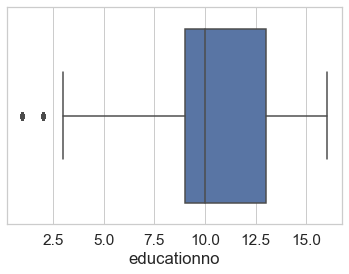

In [58]:
sn.boxplot(salary_train['educationno'])

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='capitalgain'>

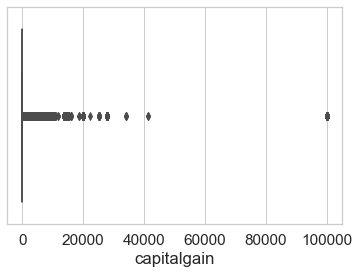

In [59]:
sn.boxplot(salary_train['capitalgain'])

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='capitalloss'>

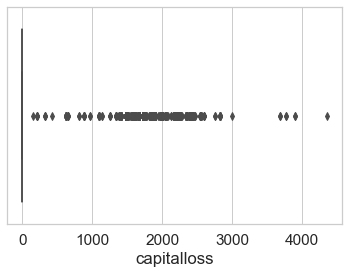

In [60]:
sn.boxplot(salary_train['capitalloss'])

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='hoursperweek'>

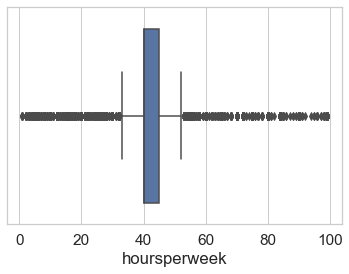

In [61]:
sn.boxplot(salary_train['hoursperweek'])

### Distplots

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

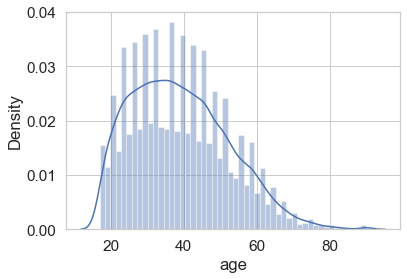

In [62]:
sn.distplot(salary_train['age'])

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='educationno', ylabel='Density'>

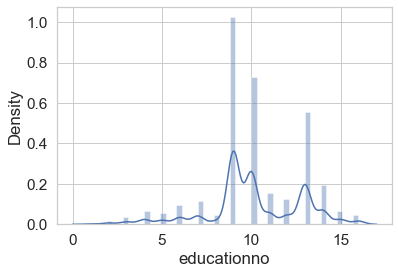

In [63]:
sn.distplot(salary_train['educationno'])

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capitalgain', ylabel='Density'>

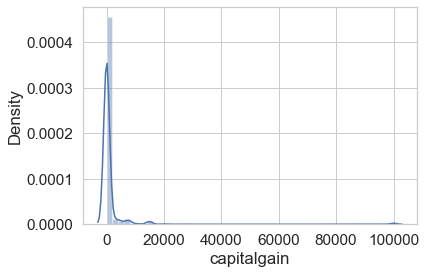

In [64]:
sn.distplot(salary_train['capitalgain'])

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capitalloss', ylabel='Density'>

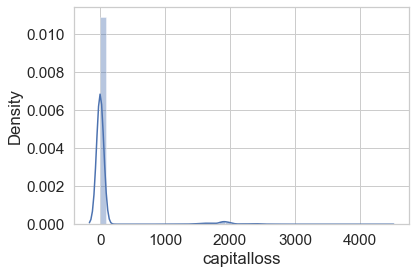

In [65]:
sn.distplot(salary_train['capitalloss'])

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hoursperweek', ylabel='Density'>

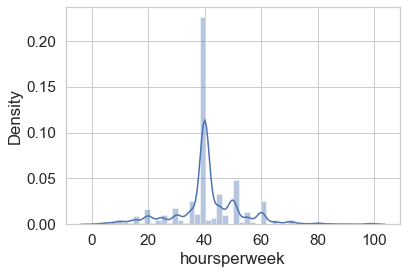

In [66]:
sn.distplot(salary_train['hoursperweek'])

# Using encoding for categorical columns

##### We need to convert categorical columns into numerical values by using encoding techniques. There are 2 most popular encoding techniques - One Hot and Label Encoding technique.

##### We will use Label Encoding for ordinal data and One Hot Encoding for nominal data

In [67]:
salary_train

,age,education,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,9,13,2174,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,9,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,11,9,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,1,7,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,9,13,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,12,14,0,0,40,>50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
30155,22,15,10,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
30156,27,7,12,0,0,38,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
30158,58,11,9,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [68]:
salary_test

,age,education,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,1,7,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,11,9,0,0,50,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,7,12,0,0,40,>50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,15,10,7688,0,40,>50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,34,0,6,0,0,30,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,9,13,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
15056,39,9,13,0,0,36,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
15057,38,9,13,0,0,50,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
15058,44,9,13,5455,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0


# Splitting the columns into feature and Label data

In [69]:
X_train = salary_train.drop('Salary',axis=1)

In [70]:
X_train.shape

(26903, 87)

In [71]:
Y_train = salary_train['Salary']
Y_train.shape

(26903,)

In [72]:
X_train

,age,education,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,9,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,9,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,11,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,1,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,9,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,12,14,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30155,22,15,10,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30156,27,7,12,0,0,38,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30158,58,11,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [73]:
Y_train

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
30154      >50K
30155     <=50K
30156     <=50K
30158     <=50K
30160      >50K
Name: Salary, Length: 26903, dtype: object

In [74]:
X_test = salary_test.drop('Salary',axis=1)
X_test.shape

(14130, 87)

In [75]:
X_test

,age,education,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,1,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,11,9,0,0,50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,7,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,15,10,7688,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,34,0,6,0,0,30,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,9,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15056,39,9,13,0,0,36,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15057,38,9,13,0,0,50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15058,44,9,13,5455,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [76]:
Y_test = salary_test['Salary']
Y_test.shape

(14130,)

In [77]:
Y_test

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
15055     <=50K
15056     <=50K
15057     <=50K
15058     <=50K
15059      >50K
Name: Salary, Length: 14130, dtype: object

# Using SVM to build the classification model

In [78]:
svm = SVC()
svm.fit(X_train, Y_train)
y_pred_svm = svm.predict(X_test)

y_pred_svm

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [80]:
print(accuracy_score(Y_test, y_pred_svm))

0.7960368011323425


In [81]:
y_pred_train_svm = svm.predict(X_train)

print(accuracy_score(Y_train, y_pred_train_svm))

0.7940378396461362


In [82]:
print(confusion_matrix(Y_test, y_pred_svm))

[[10257   363]
 [ 2519   991]]


In [83]:
print(classification_report(Y_test, y_pred_svm))

              precision    recall  f1-score   support

       <=50K       0.80      0.97      0.88     10620
        >50K       0.73      0.28      0.41      3510

    accuracy                           0.80     14130
   macro avg       0.77      0.62      0.64     14130
weighted avg       0.79      0.80      0.76     14130

